In [1]:
import omicverse as ov
ov.utils.ov_plot_set()
from matplotlib import rcParams

# 设置全局字体为Arial
rcParams['font.family'] = 'Arial'

2025-01-21 15:07:02.497995: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-21 15:07:02.511005: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-21 15:07:02.514973: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-21 15:07:02.524918: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-21 15:07:03.213569: W tensorflow/compiler/tf2


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.11, Tutorials: https://omicverse.readthedocs.io/
All dependencies are satisfied.


In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import cellrank as cr
import scvelo as scv

In [4]:
adata=sc.read('../LTNN/data/Bone-ltnn.h5ad',compression='gzip')
adata

AnnData object with n_obs × n_vars = 5275 × 3000
    obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'p_time', 'p_time_r', 'p_latent_time', 'dpt_pseudotime', 'dpt_pseudotime_p', 'p_ANN_time', 'LTNN_time', 'LTNN_time_r', 'mao', 'mao_name'
    var: 'palantir', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'T_fwd_params', 'clusters_colors', 'clusters_sizes', 'diffmap_evals', 'hvg', 'iroot', 'leiden', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'paga_graph', 'palantir_branch_probs_cell_types', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap'
    obsm: 'MAGIC_imputed_data', 'T_fwd_mde', 'X_diffmap', 'X_lsi', 'X_mde', 'X_tsne', 'X_umap', 'palantir_branch_probs', 'scaled|o

In [5]:
sc.pp.highly_variable_genes(
                adata,
                flavor="seurat_v3",
                #layer='counts',
                n_top_genes=2000,
                #batch_key=batch_key,
            )

extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


/mnt/home/zehuazeng/software/rsc/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


(array([2.09e+03, 2.63e+02, 1.80e+02, 1.73e+02, 1.58e+02, 1.23e+02,
        1.00e+01, 2.00e+00, 0.00e+00, 1.00e+00]),
 array([ 0.        ,  1.18918805,  2.3783761 ,  3.56756415,  4.7567522 ,
         5.94594025,  7.13512829,  8.32431634,  9.51350439, 10.70269244,
        11.89188049]),
 <BarContainer object of 10 artists>)

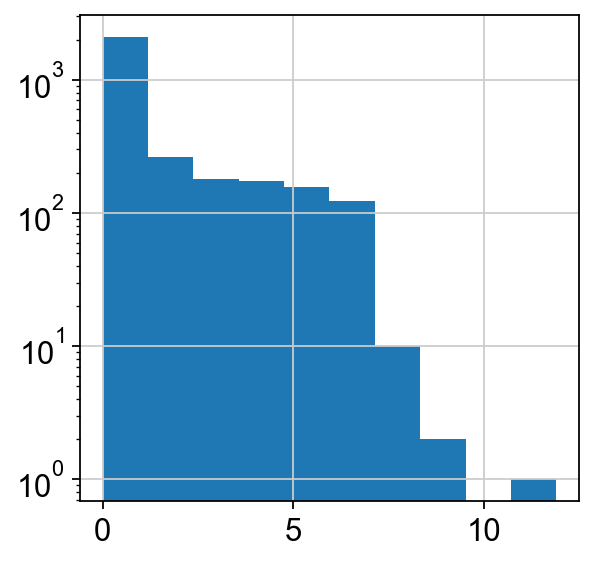

In [69]:
plt.hist(adata.var['variances'],log=True)

In [6]:
adata.layers["spliced"] = adata.X
adata.layers["unspliced"] = adata.X
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

computing neighbors
computing PCA
    with n_comps=30


/mnt/home/zehuazeng/software/rsc/lib/python3.10/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 3000 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


    finished (0:00:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [7]:
from cellrank.kernels import CytoTRACEKernel

ctk = CytoTRACEKernel(adata).compute_cytotrace()

Computing CytoTRACE score with `3000` genes. Consider using more than `10000` genes
Adding `adata.obs['ct_score']`
       `adata.obs['ct_pseudotime']`
       `adata.obs['ct_num_exp_genes']`
       `adata.var['ct_gene_corr']`
       `adata.var['ct_correlates']`
       `adata.uns['ct_params']`
    Finish (0:00:00)


/mnt/home/zehuazeng/software/rsc/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:430: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


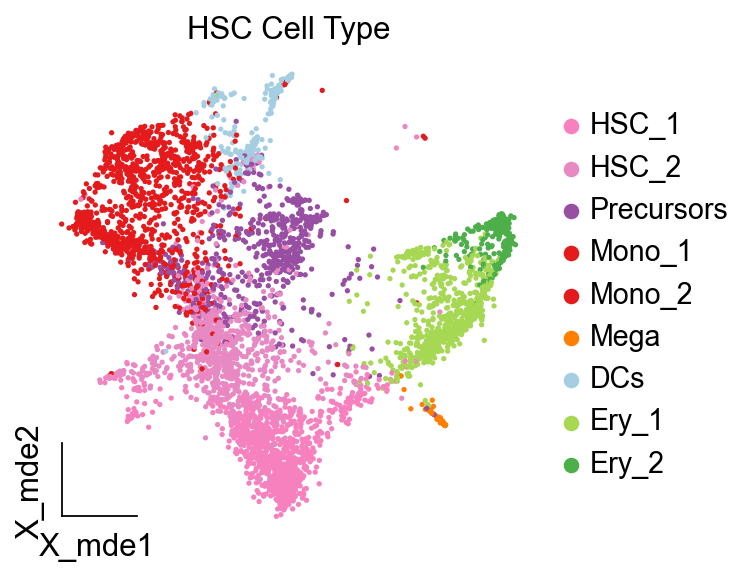

In [8]:
ov.pl.embedding(
    adata,
    basis='X_mde',
    color='clusters',
    frameon='small',
    show=False,
    title='HSC Cell Type'
)
plt.savefig("figures/review/hsc_human_clusters.png",dpi=300,bbox_inches = 'tight')

In [10]:
adata

AnnData object with n_obs × n_vars = 5275 × 3000
    obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'p_time', 'p_time_r', 'p_latent_time', 'dpt_pseudotime', 'dpt_pseudotime_p', 'p_ANN_time', 'LTNN_time', 'LTNN_time_r', 'mao', 'mao_name', 'ct_score', 'ct_pseudotime', 'ct_num_exp_genes'
    var: 'palantir', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features', 'highly_variable', 'means', 'variances', 'variances_norm', 'ct_gene_corr', 'ct_correlates'
    uns: 'T_fwd_params', 'clusters_colors', 'clusters_sizes', 'diffmap_evals', 'hvg', 'iroot', 'leiden', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'paga_graph', 'palantir_branch_probs_cell_types', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scruble

In [ ]:
CytoTRACE (Cellular (Cyto) Trajectory Reconstruction Analysis using gene Counts and Expression) 

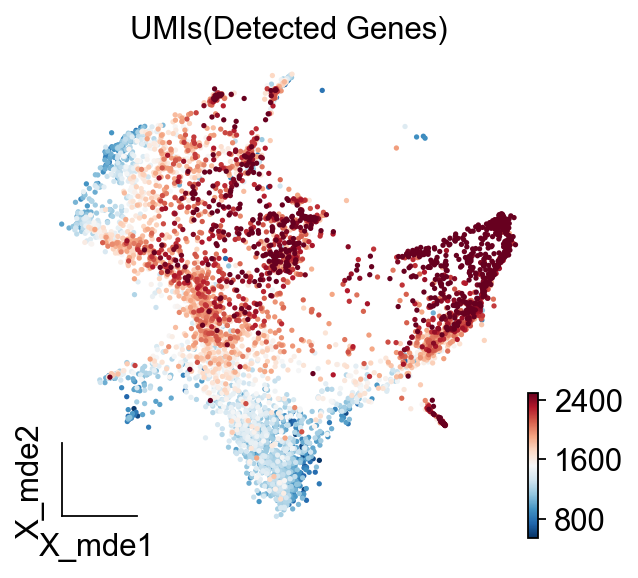

In [15]:
ov.pl.embedding(
    adata,
    basis='X_mde',
    color='detected_genes',
    frameon='small',
    show=False,
    vmax=2500,
    title='UMIs(Detected Genes)'
)
plt.savefig("figures/review/hsc_human_detected_genes.png",dpi=300,bbox_inches = 'tight')

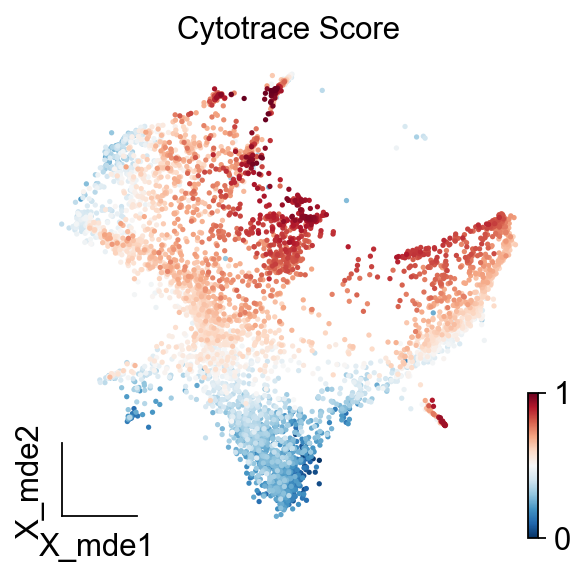

In [9]:
ov.pl.embedding(
    adata,
    basis='X_mde',
    color='ct_score',
    frameon='small',
    title='Cytotrace Score',
    show=False
)

plt.savefig("figures/review/hsc_human_cytotrace_score.png",dpi=300,bbox_inches = 'tight')

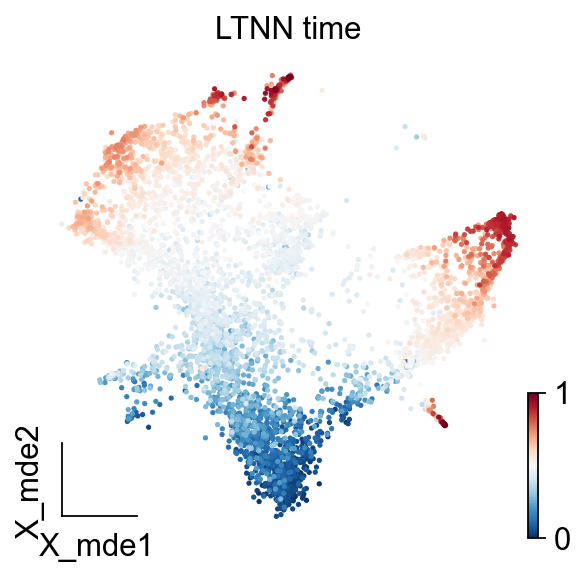

In [50]:
ov.pl.embedding(
    adata,
    basis='X_mde',
    color='palantir_pseudotime',
    frameon='small',
    title='LTNN time',
    show=False
)

plt.savefig("figures/review/hsc_human_ltnn_time.png",dpi=300,bbox_inches = 'tight')

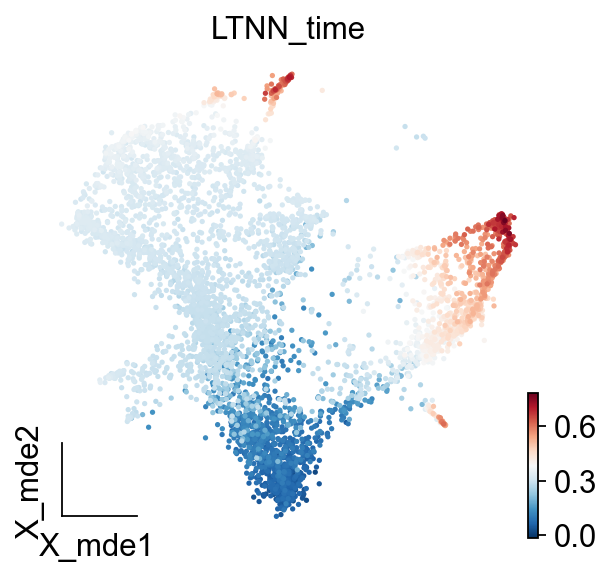

In [22]:
ov.pl.embedding(
    adata,
    basis='X_mde',
    color='LTNN_time',
    frameon='small'
)

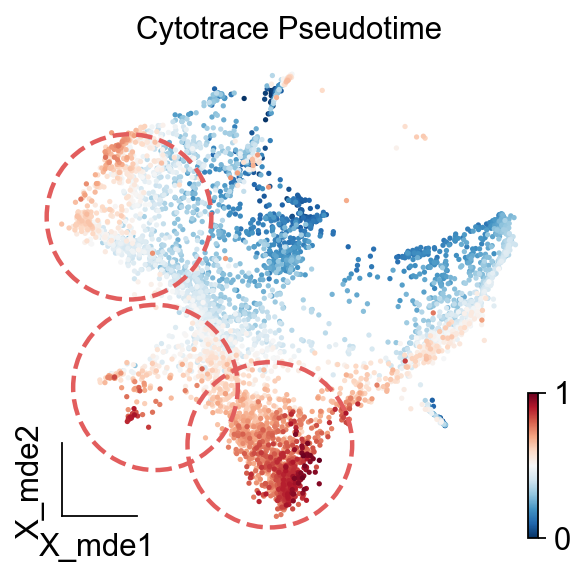

In [47]:
fig,ax=plt.subplots(figsize = (4,4))
ov.pl.embedding(
    adata,
    basis='X_mde',
    color='ct_pseudotime',
    frameon='small',
    title='Cytotrace Pseudotime',
    show=False,
    ax=ax
)
circle1_loc=adata[adata.obs['clusters']=='Mono_1'].obsm['X_mde'].mean(axis=0)
circle1_max=adata[adata.obs['clusters']=='Mono_1'].obsm['X_mde'].max(axis=0)
circle1_r=abs(circle1_loc[0]-circle1_max[0])
circle1=plt.Circle(circle1_loc, 0.6*1.2, color='#e25d5d',fill=False,ls='--',lw=2)
ax.add_patch(circle1)

circle1_loc=adata[adata.obs['clusters']=='HSC_1'].obsm['X_mde'].mean(axis=0)
circle1_max=adata[adata.obs['clusters']=='HSC_1'].obsm['X_mde'].max(axis=0)
circle1_r=abs(circle1_loc[0]-circle1_max[0])
circle1=plt.Circle(circle1_loc, 0.6*1.2, color='#e25d5d',fill=False,ls='--',lw=2)
ax.add_patch(circle1)

circle1_loc=adata[adata.obs['clusters']=='HSC_1'].obsm['X_mde'].mean(axis=0)
circle1_loc[0]-=1
circle1_loc[1]+=0.5
circle1_max=adata[adata.obs['clusters']=='HSC_1'].obsm['X_mde'].max(axis=0)
circle1_r=abs(circle1_loc[0]-circle1_max[0])
circle1=plt.Circle(circle1_loc, 0.6*1.2, color='#e25d5d',fill=False,ls='--',lw=2)
ax.add_patch(circle1)

plt.savefig("figures/review/hsc_human_cytotrace_pseudotime.png",dpi=300,bbox_inches = 'tight')